In [27]:
# Load Data
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


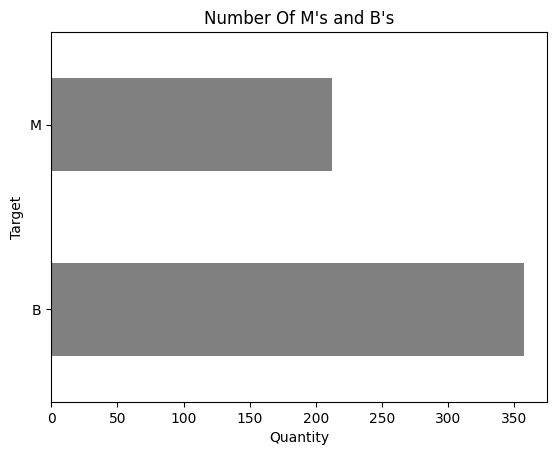

In [28]:
# Plot Classes
import matplotlib.pyplot as plt

labels = df[1].value_counts()
labels.plot.barh(color='gray')
plt.title("Number Of M's and B's")
plt.xlabel("Quantity")
plt.ylabel("Target")
plt.grid(False);

In [29]:
# Split between features and label
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [30]:
# Encode y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enconded = le.fit_transform(y)

le.classes_, le.transform(['B', 'M'])

(array(['B', 'M'], dtype=object), array([0, 1]))

In [31]:
## Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enconded, test_size=0.2, random_state=42)

In [32]:
print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test {y_test.shape}')

X_train: (455, 30) y_train: (455,)
X_test: (114, 30) y_test (114,)


In [33]:
## Create a pipeline

# Scaling
# PCA
# Estimator

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_reg = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
pipe_reg

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [34]:
## Fit and Score
pipe_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [35]:
y_hat = pipe_reg.predict(X_test)
score = pipe_reg.score(X_test, y_hat) # why X_test?
print(f'Test accuracy: {score:.3f}')

Test accuracy: 1.000


## Futher Reading

- [Why Use Stratify?](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

---
- [What is PCA?]()
- [Why Use PCA?]()
- [When use PCA?]()
---

- [Why make_pipeline uses X_test and y_test](https://stackoverflow.com/questions/72407373/scoring-method-of-make-pipeline-scikit-learn-function)?